





# Investigate No-Show Appointments in medical institutions in Brazil

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
# Introduction

> This project investigate the No-show or show appointments in several medical institution around Brazil. The data set in this analysis contains the recoreds for over 110k patints aroud the contry with aditional information about the health condition of the patients, thier living nighbourhood and if they are inrolled in the financial support program provided by the goverment or not. the data set will be cleand and explored for an initial trends and conclusion.

<a id='wrangling'></a>
## Data Wrangling



In [1]:
import pandas as pd 
import numpy as np 
import matplotlib as plt 
import seaborn as sns
%matplotlib inline 

In [2]:

df=pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head(1)


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [3]:
df.shape  #in this analysis we are using 110527 patients records collected from ,,,,,,

(110527, 14)

In [4]:
df.info()  #no nulls 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [5]:
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

- some of the columns labels contains issues like typos, mixed upper and lower case letters. 
- Some of the columns need to change the format of the data like patient_id, scheduled_day and appointment_day. 

In [6]:
df.columns=['patient_id','appointment_id', 'gender', 'scheduled_day','appointment_day','age', 'neighbourhood','scholarship','hypertension','diabetes','alcoholism','handicap','sms_received','no_show']
df.head(1)   #i have changed all upper-case to lower, corrected typos and used underscore 

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [7]:
sum(df.duplicated()) #no duplicates 

0

In [8]:
df['scheduled_day']=pd.to_datetime(df['scheduled_day'])         #changing the format from object to date time 
df['appointment_day']=pd.to_datetime(df['appointment_day'])
df['patient_id']=df['patient_id'].astype(int)                   #changing the format from float to int
df.head(2)

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,29872499824296,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No


In [9]:
df.describe()

,patient_id,appointment_id,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921700e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


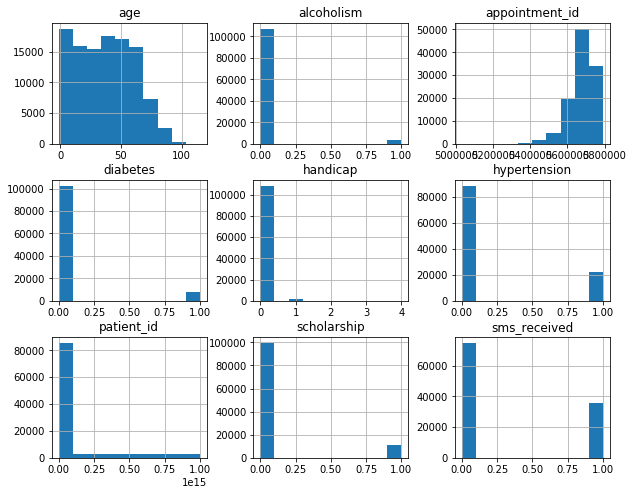

In [10]:
df.hist(figsize=(10,8));

# General Observations:
- From the summary statistics it is noticed that the min age is -1,which is not realistic or it could be an infants patients. In such a situation these rows could be dropped or replaced with mean or median depending on different factors such as amount of data and importance. 
- The column 'appointment_id' have no impact and will not be used in the analysis, so it will be drpped. 

In [11]:
df[df.age<=0]  


,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
59,71844284745331,5638545,F,2016-04-29 08:08:43,2016-04-29,0,CONQUISTA,0,0,0,0,0,0,No
63,236623344873175,5628286,M,2016-04-27 10:46:12,2016-04-29,0,SÃO BENEDITO,0,0,0,0,0,0,No
64,188517384712787,5616082,M,2016-04-25 13:28:21,2016-04-29,0,ILHA DAS CAIEIRAS,0,0,0,0,0,1,No
65,271881817799985,5628321,M,2016-04-27 10:48:50,2016-04-29,0,CONQUISTA,0,0,0,0,0,0,No
67,86471282513499,5639264,F,2016-04-29 08:53:02,2016-04-29,0,NOVA PALESTINA,0,0,0,0,0,0,No
89,431493164159576,5640380,M,2016-04-29 10:37:02,2016-04-29,0,MONTE BELO,0,0,0,0,0,0,No
101,68228473371639,5642813,M,2016-04-29 17:24:19,2016-04-29,0,BONFIM,0,0,0,0,0,0,No
104,3326985214249,5632495,F,2016-04-28 08:04:48,2016-04-29,0,SANTO ANTÔNIO,0,0,0,0,0,0,Yes
132,846858655833146,5560742,M,2016-04-08 09:29:23,2016-04-29,0,PRAIA DO SUÁ,0,0,0,0,0,1,Yes
150,53924187266,5641476,M,2016-04-29 13:43:34,2016-04-29,0,ITARARÉ,0,0,0,0,0,0,No


- 3540 rows out of 110527 is more than 3% of the original data set so dropping the data is not a good idea, but insted i will remove the outliers.

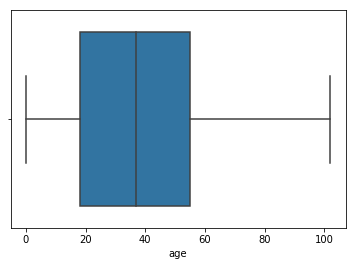

In [12]:
df=df[(df.age>-1) &(df.age<115)]
sns.boxplot(df.age);


In [13]:
df[df.age<0] #to chick if all were muted 

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show


In [14]:
df.drop(['appointment_id'], axis=1, inplace=True)
df.head(2)

,patient_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,29872499824296,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No


- for plotting purpuses the 'no_show' column will replace its value(yes,no) to 0s & 1s
- 'no_show'data format will be change to bool, 0s indicate False (showed to the appointment), and 1s indicate True (did not show).
- then ive counted the values to have an insight about it. 

In [15]:
df['no_show'].replace({'No':0,'Yes':1}, inplace=True)

In [16]:
df['no_show'] = df['no_show'].astype('bool', inplace=True)

In [17]:
df['no_show'].nunique()

2

In [18]:
df['no_show'].value_counts()

False    88205
True     22316
Name: no_show, dtype: int64

In [19]:
df.to_csv('project2_cleaned.csv', index=False)



## Exploratory Data Analysis

In [20]:

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
dfc=pd.read_csv('project2_cleaned.csv')


In [21]:
dfc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110521 entries, 0 to 110520
Data columns (total 13 columns):
patient_id         110521 non-null int64
gender             110521 non-null object
scheduled_day      110521 non-null object
appointment_day    110521 non-null object
age                110521 non-null int64
neighbourhood      110521 non-null object
scholarship        110521 non-null int64
hypertension       110521 non-null int64
diabetes           110521 non-null int64
alcoholism         110521 non-null int64
handicap           110521 non-null int64
sms_received       110521 non-null int64
no_show            110521 non-null bool
dtypes: bool(1), int64(8), object(4)
memory usage: 10.2+ MB



## The proportion subjects showed vs not showed to thier appointments

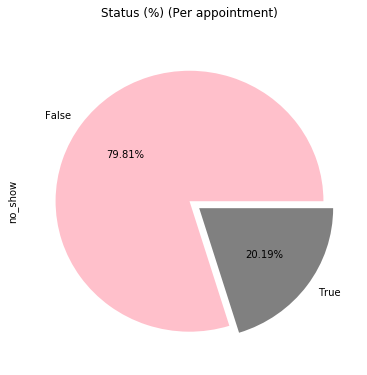

In [22]:
dfc.no_show.value_counts().plot.pie(figsize=(6,6),autopct='%.2f%%',explode=(0, .09), title=("Status" + ' (%) (Per appointment)\n'), colors=['pink','gray']);

#0s indicates False (showed to the appointment), and 1s indicate True (did not show).

true for yes 20.19% did not show for their appointment 

# Neighbourhood:
-Does Neighbourhoods have the same numbers of No Shows? or have variations 

In [23]:
dfc['neighbourhood'].value_counts()    

JARDIM CAMBURI                 7717
MARIA ORTIZ                    5805
RESISTÊNCIA                    4431
JARDIM DA PENHA                3877
ITARARÉ                        3514
CENTRO                         3334
TABUAZEIRO                     3132
SANTA MARTHA                   3131
JESUS DE NAZARETH              2853
BONFIM                         2773
SANTO ANTÔNIO                  2746
SANTO ANDRÉ                    2571
CARATOÍRA                      2565
JABOUR                         2509
SÃO PEDRO                      2448
ILHA DO PRÍNCIPE               2266
NOVA PALESTINA                 2264
ANDORINHAS                     2258
DA PENHA                       2217
ROMÃO                          2214
GURIGICA                       2018
SÃO JOSÉ                       1976
BELA VISTA                     1907
MARUÍPE                        1902
FORTE SÃO JOÃO                 1889
ILHA DE SANTA MARIA            1885
SÃO CRISTÓVÃO                  1836
REDENÇÃO                    

- we have 81 neighbourhood, here am counting the number of patients per Neighbourhood regardless the no show.
- after, i will group it with the no-show to see the numbers of no-show per Neighbourhood

In [24]:
n_show=dfc.groupby('neighbourhood').sum()['no_show']

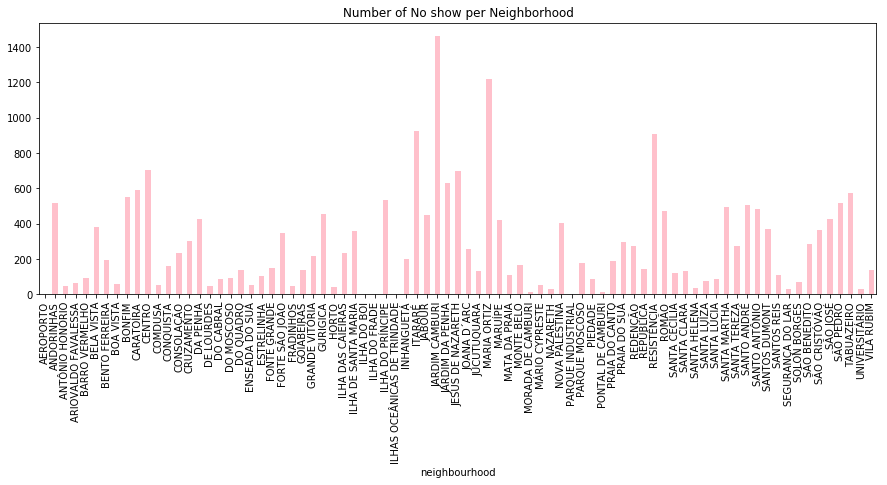

In [25]:
n_show.plot(kind='bar', figsize=(15,5), color='pink', title='Number of No show per Neighborhood');



In [26]:
n_show=n_show.to_frame()
n_show.reset_index(inplace=True)
n_show.sort_values(ascending=False, by='no_show', inplace=True)
n_show.tail()

,neighbourhood,no_show
31,ILHA DO BOI,3.0
32,ILHA DO FRADE,2.0
34,ILHAS OCEÂNICAS DE TRINDADE,2.0
0,AEROPORTO,1.0
51,PARQUE INDUSTRIAL,0.0


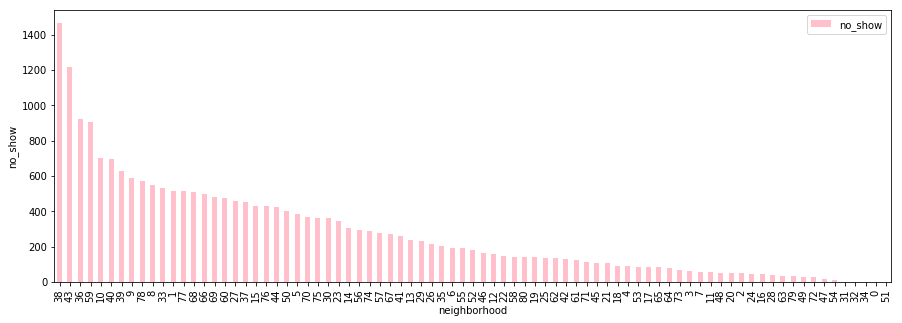

In [27]:
n_show.plot(kind='bar', figsize=(15,5), color='pink');
plt.xlabel('neighborhood')
plt.ylabel('no_show')
plt.title=('No show of Patients per Neighborhood')
plt.legend()
#after sorting ascendingly for better visual

JARDIM CAMBURI neighbourhood has the highest numbers of patients skipping their appointments while PARQUE INDUSTRIAL neighbourhood has none no-show incidence


### Medical Conditions: Diabetes, Hypertension, Alcoholism:
- Does a specific health issuse patients committed to their appointments more than the rest?

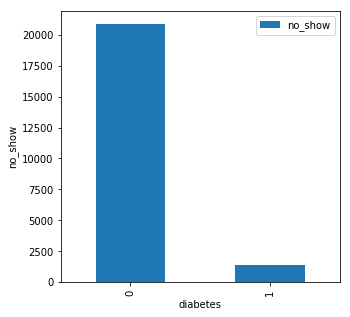

In [28]:
dfc.groupby('diabetes').sum()['no_show'].plot(kind='bar', figsize=(5,5));
plt.xlabel('diabetes')
plt.ylabel('no_show')
plt.title=('Number of No-show for Diabetic patients')
plt.legend();

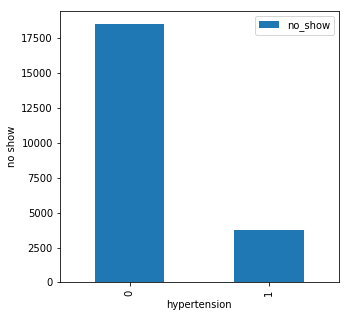

In [29]:
dfc.groupby('hypertension').sum()['no_show'].plot( kind='bar', figsize=(5,5));
plt.xlabel('hypertension')
plt.ylabel('no show')
plt.title=('Number of No-show for hypertention patients')
plt.legend();

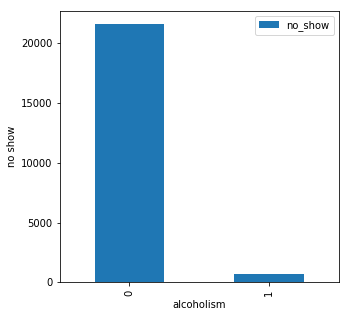

In [30]:
dfc.groupby('alcoholism').sum()['no_show'].plot( kind='bar', figsize=(5,5));
plt.xlabel('alcoholism')
plt.ylabel('no show')
plt.title=('Number of No show for alcoholic patients')
plt.legend();

the numbers of no show cases per health conditions were very similar 
alcoholic patients have the highst numbers of patients skipping their appointments anonge the rest of the health conditions veiwed.

### 2- SMS: 
- Is SMS reminders associated with lowered incidences of No Shows?

Text(0,0.5,'%No-Show')

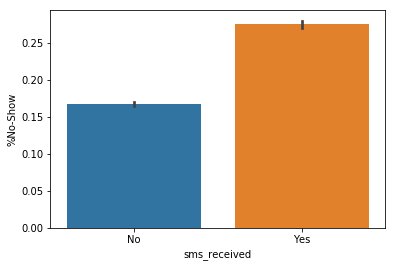

In [31]:
sms={1:'Yes', 0:'No'} #to map this dictionary for the sms_received column 
ax = sns.barplot(x=dfc.sms_received.map(sms), y=dfc.no_show)
ax.set_ylabel('%No-Show')


the percentage of no show patients was mach higher in those how recived sms reminders 

<a id='conclusions'></a>
## Conclusions

In this investigation of No-Show Appointments in medical institutions in Brazil, the data were cleaned and explored for initial insghts of the factors that may have higher numbers of no-show more then other.  

First, i have started with chicking the proportion of subjects showed vs not showed to thier appointments, almost 80% of the subjects did commit to their appointments.

Then more exceploration was done for the no-show incidence to see if there are factors that have higher number of no-show more then others. begining with Neighbourhood, from the plot we can see large differences in no-show number between different Neighbourhoods, some of it have extremly high numbers while others dont. 

Medical Conditions (Diabetes, Hypertension, Alcoholism) were very similar in the numbers of no show. no none of these conditions have higher numbers of no show compared to others.


the SMS reminders results was surprising, the percentage of no show patients was mach higher in those how recived sms reminders.


limitations:
The numbers of appontment per Neighbourhood regardless the no-show was not equal btween Neighbourhoods. some are having up to 7717 appointment while other Neighbourhoods have only 1. equal numbers of appointments can bring much more clear conclusions. Also having background information about the distance to the health care facility, financial state of the Neighbourhood can help exeploring more predictors.
 
 
 





In [32]:
df.to_csv('project2_conclusion.csv', index=False)